In [89]:
from fastai.basics import *
from ipywidgets import interact
plt.rc('figure',dpi=90)

In [90]:
def plot_func(f,title=None,min=-2.1,max=2.1,color='b',ylim=None):
    x=torch.linspace(min,max,100)[:None]
    if ylim: plt.ylim(ylim)
    plt.plot(x,f(x),color)
    if title: plt.title(title)

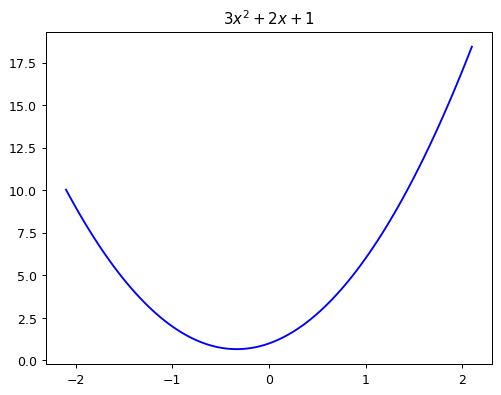

In [91]:
def intial_fn(x):
    return 3*x**2+2*x+1

plot_func(intial_fn,"$3x^2+2x+1$")

In [92]:
def quad(a,b,c,x):
    return a*x**2+b*x+c

def mk_quad(a,b,c):
    return partial(quad,a,b,c)

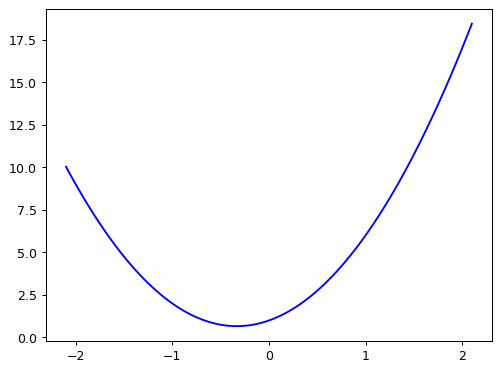

In [93]:
f2=mk_quad(3,2,1)
plot_func(f2)

In [94]:
def noise(x, scale):
    return np.random.normal(scale=scale,size=x.shape)
def add_noise(x,mult,add):
    return x*(1+noise(x,mult))+noise(x,add)

In [95]:
np.random.seed(42)

x=torch.linspace(-2,2,steps=20)[:None]
y=add_noise(f(x),0.15,1.5)

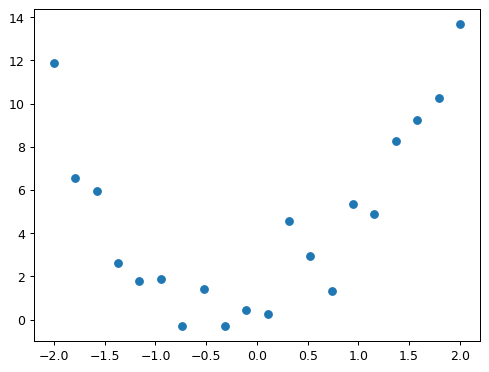

In [96]:
plt.scatter(x,y)
plt.show()

In [97]:
@interact(a=1.1,b=1.1,c=1.1)
def plot_quad(a,b,c):
    plt.scatter(x,y)
    plot_func(mk_quad(a,b,c),ylim=(-3,13))

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [98]:
def mae(pred,act):
    return (torch.abs(pred-act)).mean()

In [99]:
@interact(a=1.1,b=1.1,c=1.1)
def plot_quad(a,b,c):
    plt.scatter(x,y)
    f=mk_quad(a,b,c)
    loss=mae(f(x),y)
    plot_func(mk_quad(a,b,c),ylim=(-3,13),title=f'loss mean:{loss:.4f}')

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [100]:
print(y)

tensor([11.8690,  6.5433,  5.9396,  2.6304,  1.7947,  1.9010, -0.2977,  1.4315,
        -0.2804,  0.4521,  0.2547,  4.5743,  2.9681,  1.3385,  5.3754,  4.8878,
         8.2467,  9.2462, 10.2612, 13.6939], dtype=torch.float64)


In [101]:
def quad_mae(params):
    f=mk_quad(*params)
    return mae(f(x),y)

In [102]:
quad_mae([1,1,1])

tensor(2.6103, dtype=torch.float64)

In [103]:
abc=torch.tensor([1.1,1.1,1.1])
abc.requires_grad_()

tensor([1.1000, 1.1000, 1.1000], requires_grad=True)

In [104]:
loss=quad_mae(abc)
loss

tensor(2.4219, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [105]:
loss.backward()

In [106]:
print(abc.grad)

tensor([-1.3529, -0.0316, -0.5000])


In [107]:
with torch.no_grad():
    abc-=abc.grad*0.01
    loss=quad_mae(abc)
print(f'loss: {loss:.2f}')

loss: 2.40


In [109]:
for i in range(15):
    loss=quad_mae(abc)
    loss.backward()
    with torch.no_grad():
        abc-=abc.grad*0.01
    print(f'loss-{i}: {loss:.2f}')

loss-0: 2.40
loss-1: 2.34
loss-2: 2.26
loss-3: 2.15
loss-4: 2.03
loss-5: 1.89
loss-6: 1.75
loss-7: 1.61
loss-8: 1.48
loss-9: 1.37
loss-10: 1.24
loss-11: 1.17
loss-12: 1.16
loss-13: 1.24
loss-14: 1.38


In [110]:
abc=t

tensor([2.8188, 1.2597, 1.6550], requires_grad=True)